In [ ]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
 
img = cv2.imread('C:/Users/kkoni/Desktop/Python/OK.jpg')
plt.imshow(img)
plt.show()


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)
plt.show()

Zakres od 0 do 10


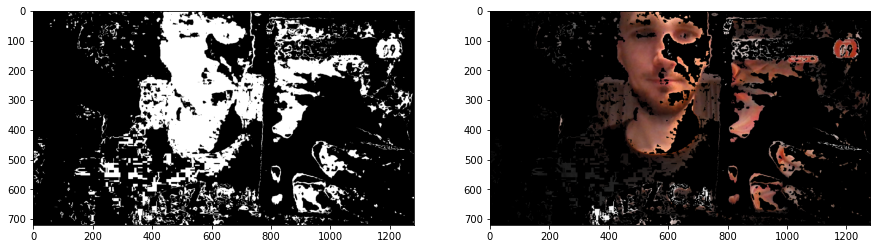

Zakres od 10 do 20


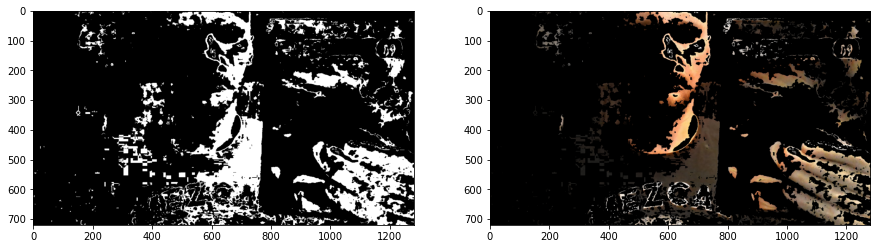

Zakres od 20 do 30


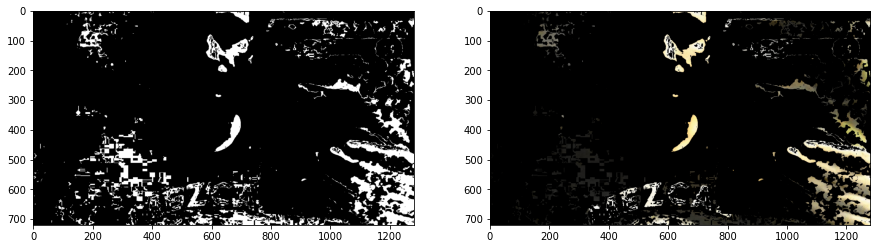

Zakres od 30 do 40


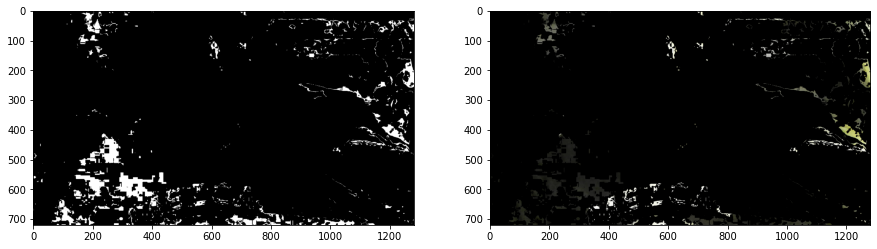

Zakres od 40 do 50


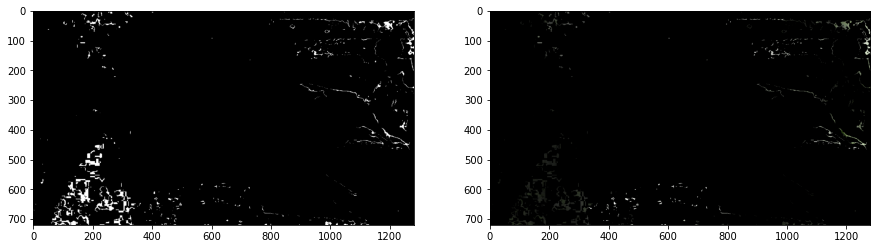

Zakres od 50 do 60


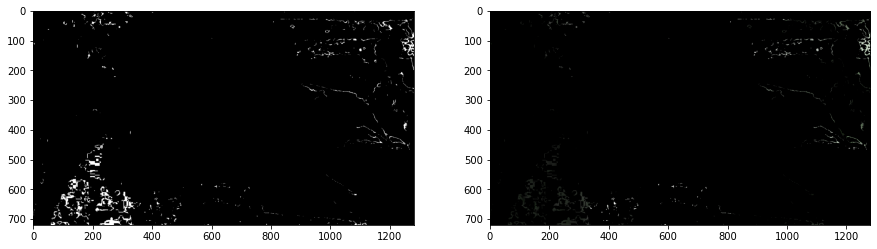

Zakres od 60 do 70


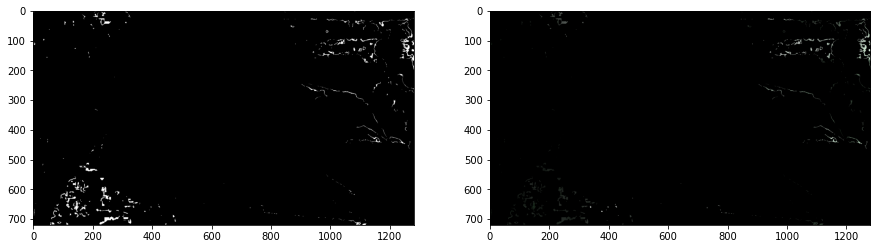

Zakres od 70 do 80


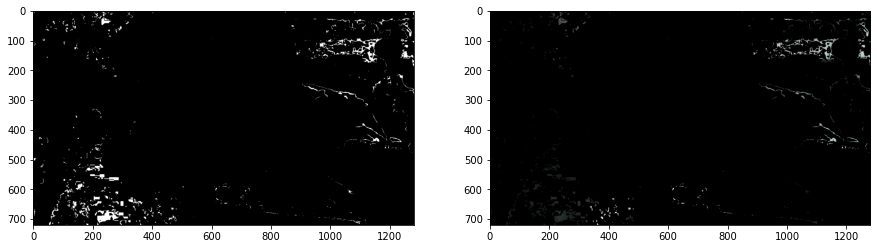

Zakres od 80 do 90


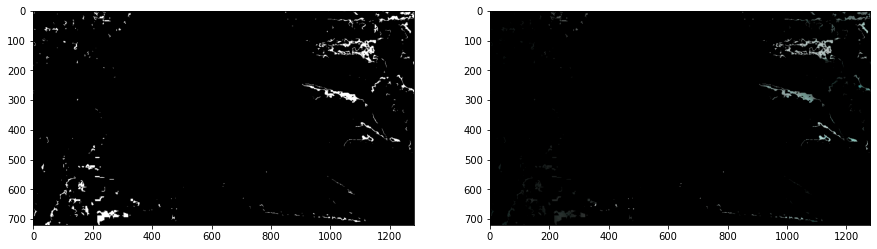

Zakres od 90 do 100


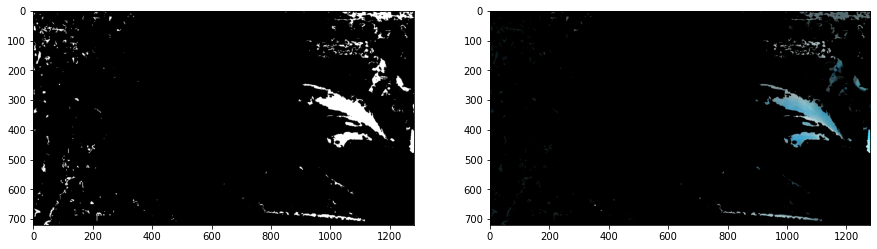

Zakres od 100 do 110


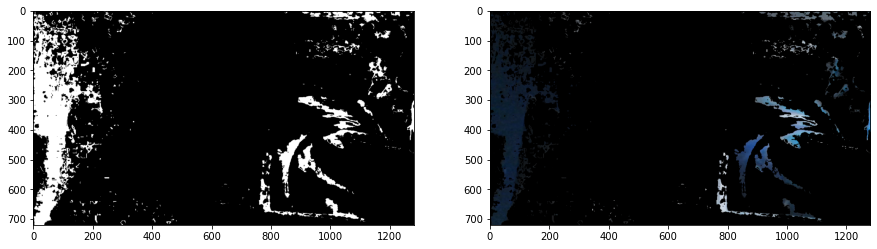

Zakres od 110 do 120


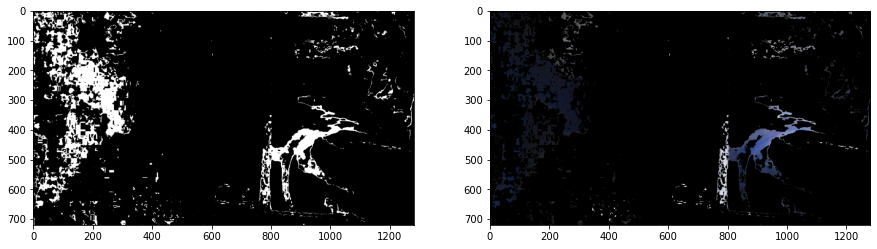

Zakres od 120 do 130


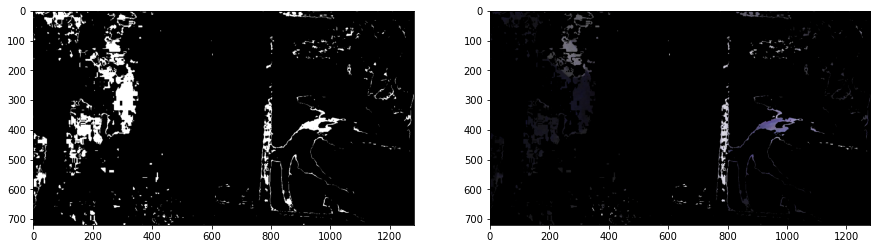

Zakres od 130 do 140


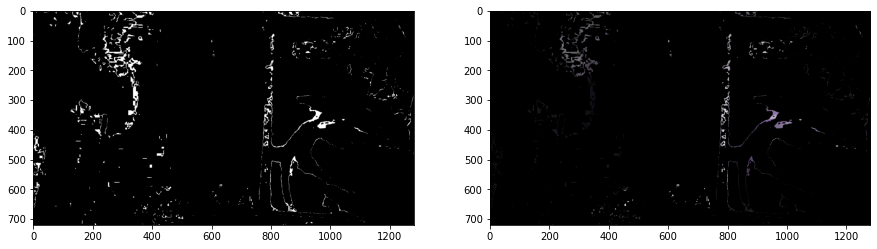

Zakres od 140 do 150


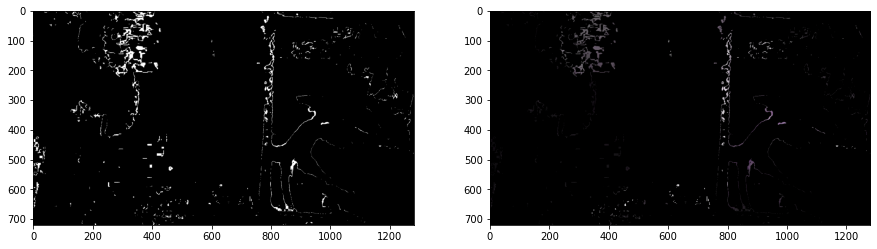

Zakres od 150 do 160


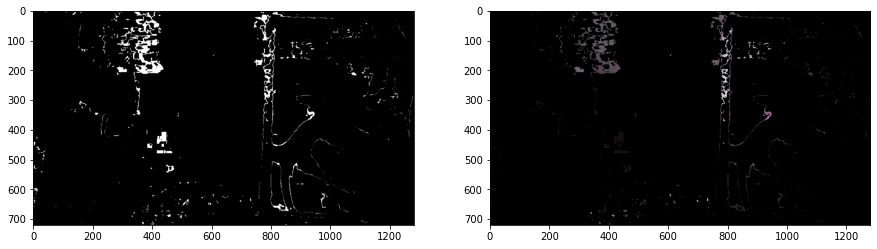

Zakres od 160 do 170


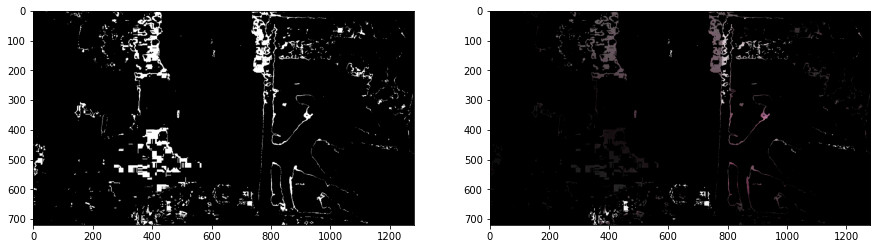

Zakres od 170 do 180


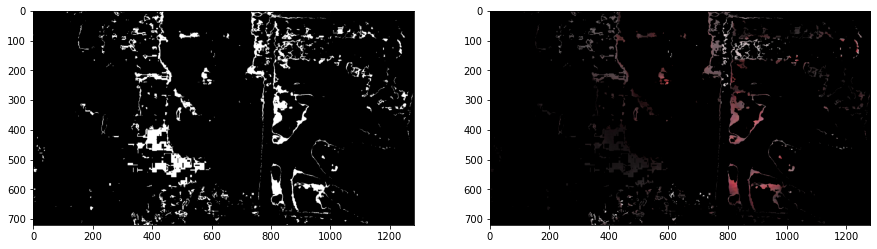

In [4]:
for i in range(18):
    print(f'Zakres od {10*i} do {10*i+10}')
    color_from = (10*i,0,0)
    color_to = (10*i+10,255,255)
    mask = cv2.inRange(hsv_img, color_from, color_to)
    result = cv2.bitwise_and(img, img, mask=mask)
     
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.imshow(mask, cmap="gray")
    ax2.imshow(result)
    plt.show()

In [7]:
def create_mask_red_color(img):
    light_red_part1 = (0,120,50)
    dark_red_part1 = (10, 255, 255)
     
    light_red_part2 = (170,120,50)
    dark_red_part2 = (180, 255, 255)
     
    mask1 = cv2.inRange(hsv_img, light_red_part1, dark_red_part1)
    mask2 = cv2.inRange(hsv_img, light_red_part2, dark_red_part2)
     
    mask_open = cv2.morphologyEx(mask1+mask2, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
    mask_dilate = cv2.morphologyEx(mask_open, cv2.MORPH_DILATE, np.ones((5,5),np.uint8))
    mask_close = cv2.morphologyEx(mask_dilate, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))
 
    return mask_close

In [8]:
# tworzymy objekt VideoCapture
cap = cv2.VideoCapture(0)
 
# dajemy czas kamerce na złapanie ostrości
time.sleep(3)
 
#zapisujemy w pamięci pierwsze zdjęcie po tych 3 sekundach
background=0
ret,background = cap.read()
 
while(True):
    # przechwytujemy obraz real-time z kamery
    ret, img = cap.read()
 
    # konwersja BGR na HSV
    hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
     
    # tworzymy maskę wykorzystujemy naszą funkcję
    mask = create_mask_red_color(hsv_img)
     
    # tworzymy drugą maskę - wszystko poza ubraniem 
    mask_inverted = cv2.bitwise_not(mask)
     
    # zostawiamy z przechwyconego obrazka wszystko poza płaszczem
    result_inverted = cv2.bitwise_and(img,img,mask=mask_inverted)  
     
    # z statycznego screena tła wycinamy piksele dla naszego płaszcza 
    result_mask = cv2.bitwise_and(background, background, mask = mask)
     
    # łączymy oba zdjęcia
    final_output = cv2.addWeighted(result_inverted,1,result_mask,1,0)
     
    #wyświetlamy wynik
    cv2.imshow("magic",final_output)
 
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()